<a href="https://colab.research.google.com/github/pedro9olivares/ODEs/blob/main/Ecuaciones_Diferenciales_Ordinarias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

# Ápendice


In [ ]:
# Método de Newton
def newton(f, df, x0, tol, iteraciones_max=25):
  resultados = [(0, x0)]
  cont = 1
  x = x0 - f(x0)/df(x0)
  resultados.append((cont, x))
  
  while abs(x0 - x) > tol and cont < iteraciones_max:
    x0 = x
    x = x0 - f(x0)/df(x0)

    cont += 1
    resultados.append((cont, x))
  return resultados,x

In [ ]:
# Prueba del método de Newton (Example 1.11)
f = lambda x: x**3 + x - 1
df = lambda x: 3*x**2 + 1
x0 = -0.7
tol = 10**-9

resultados, x = newton(f, df, x0, tol)
tabla_resultados = pd.DataFrame(resultados, columns=['i','x_i'])

tabla_resultados.style.hide_index()

i,x_i
0,-0.700000
1,0.127126
2,0.957678
3,0.734828
4,0.684592
5,0.682332
6,0.682328
7,0.682328


# Método de Euler (explícito)

### Código 

In [ ]:
def euler_ex(flujo, intervalo, valor_inicial, num_pasos):
  """
  """
  inicio = intervalo[0]
  fin = intervalo[-1]
  h  = (fin - inicio)/num_pasos

  n = [0]
  t = [inicio]
  w = [valor_inicial]
  
  for i in range(num_pasos):
    n.append(i + 1)
    t.append(t[i] + h)
    w.append(paso_euler(h, flujo, t[i], w[i]))

  return n, t, w 

def paso_euler(h, flujo, t, y):
  """
  paso_euler desc 

  :param h: desc
  :param flujo: desc
  ...

  :return: des
  """
  return y + h*flujo(t,y)


### Pruebas


#### Ejemplo 6.1

\begin{align}
  \begin{cases}
    y' = ty + t^3 \\
    y(0) = y_0 = 1 \\
    t \in  [0,1]
  \end{cases}
\end{align}

In [ ]:
f = lambda t,y: t*y + t**3 
y_0 = 1

paso,t_i,w_i
0,0.000000,1.000000
1,0.100000,1.000000
2,0.200000,1.010100
3,0.300000,1.031102
4,0.400000,1.064735
5,0.500000,1.113724
6,0.600000,1.181911
7,0.700000,1.274425
8,0.800000,1.397935
9,0.900000,1.560970


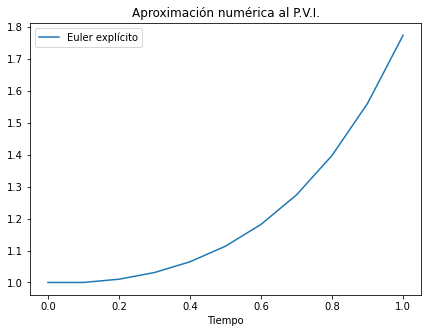

In [ ]:
# Número de pasos n = 10, a y b denotan el inicio y fin del intervalo.
num_pasos = 10
a  = 0
b  = 1

h = (b - a) / num_pasos
intervalo = np.arange(a, b + h, h)
n, t, w = euler_ex(flujo=f, intervalo=intervalo, valor_inicial=y_0, num_pasos=num_pasos)
tabla_resultados = pd.DataFrame(zip(n, t, w), columns=['paso','t_i','w_i'])

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(t, w, label='Euler explícito')
ax.set_xlabel('Tiempo')
ax.set_title('Aproximación numérica al P.V.I.')
ax.legend()

tabla_resultados.style.hide_index()


La solución general de la EDO es

\begin{align}
    y(t) = (2 + y_0)e^{\frac{t^2}{2}}-t^2-2 ,
\end{align}

y por lo tanto la solución exacta al PVI es

\begin{align}
    y(t) = 3e^{\frac{t^2}{2}}-t^2-2,
\end{align}

con lo que podemos comparar nuestra aproximación, variando en cada caso el número de pasos $n$, contra la solución exacta en $t=1$.



In [ ]:
y = lambda t: 3*np.exp((t**2)/2) - t**2 - 2

pasos n,tamaño del paso h,w(1),y(1),error global
5,0.200000,1.630648,1.946164,0.315516
10,0.100000,1.774357,1.946164,0.171807
20,0.050000,1.856245,1.946164,0.089918
40,0.025000,1.900127,1.946164,0.046037
80,0.012500,1.922866,1.946164,0.023298
160,0.006250,1.934444,1.946164,0.011720
320,0.003125,1.940286,1.946164,0.005878
640,0.001563,1.943220,1.946164,0.002944


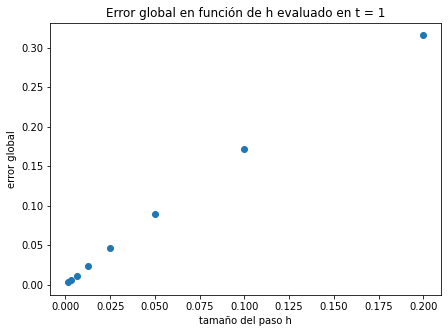

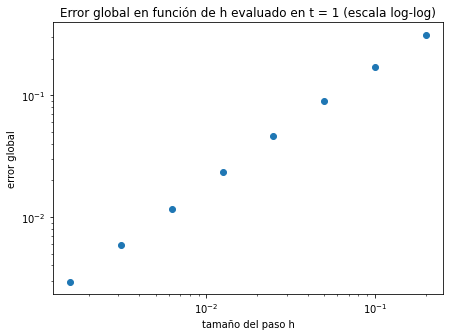

In [ ]:
resultado_exacto = y(1)
resultados_cada_paso = []
h_cada_paso = []
pasos = [5, 10, 20, 40, 80, 160, 320, 640]

for n_ in pasos:
  h = (b - a) / n_
  intervalo = np.arange(a, b + h, h)
  n, t, w = euler_ex(flujo=f, intervalo=intervalo, valor_inicial=y_0, num_pasos=n_)
  resultados_cada_paso.append(w[-1])
  h_cada_paso.append(h)

tabla_resultados = pd.DataFrame(zip(pasos, h_cada_paso, resultados_cada_paso,), 
                                columns=['pasos n', 'tamaño del paso h','w(1)'])
tabla_resultados['y(1)'] = resultado_exacto
errores_globales = abs(tabla_resultados['y(1)'] - tabla_resultados['w(1)'])
tabla_resultados['error global'] = errores_globales

fig1, ax1 = plt.subplots(figsize=(7,5))
ax1.plot(h_cada_paso, errores_globales, 'o')
ax1.set_xlabel('tamaño del paso h')
ax1.set_ylabel('error global')
ax1.set_title('Error global en función de h evaluado en t = 1')

fig2, ax2 = plt.subplots(figsize=(7,5))
ax2.plot(h_cada_paso, errores_globales, 'o')
ax2.set_xlabel('tamaño del paso h')
ax2.set_ylabel('error global')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('Error global en función de h evaluado en t = 1 (escala log-log)')

tabla_resultados.style.hide_index()

Notar que en este ejemplo el error global en $t = 1$ tiene una pendiente de 1 en una escala log-log, por lo que el error global es proporcional al tamaño del paso $h$.



De hecho, el error de truncamiento local del método de Euler satisface 
\begin{align}
    e_i \leq M\frac{h^2}{2},
\end{align}
donde M es una cota superior de $y''$ en el intervalo $[a,b]$ relevante (análisis derivado de la expansión en serie de Taylor).

En este ejemplo particular, pasa que $y''(t) = (t^2+2)e^{\frac{t^2}{2}} - 2$, cuyo valor absoluto está acotado por arriba en $[0,1]$ por $M=y''(1)=3\sqrt{e}-2$. Por lo tanto, el error de truncamiento local satisface
\begin{align}
    e_i \leq (3\sqrt{e}-2)\frac{h^2}{2}
\end{align}

A su vez, el error de truncamiento global del método de Euler satisface
\begin{align}
    g_i \leq \frac{Mh}{2L}(e^{L(t_i-a)}-1),
\end{align}
donde L es la constante de Lipschitz del flujo, a es el inicio del intervalo y M como arriba (análisis derivado del análisis del error de truncamiento local en cada paso $i$).

Por lo tanto, en este ejemplo particular
\begin{align}
    g_i \leq \frac{Mh}{2L}e^L(1-0) = \frac{(3\sqrt{e}-2)}{2}eh \approx 4.004h
\end{align}
Es decir, el error global será a lo más 4 veces el tamaño del paso $h$, lo cual se puede verificar con nuestra tabla de errores para diferentes $h$ de arriba (en la cual los errores son alrededor del doble de $h$).

A final de cuentas, el método de Euler resulta ser un método de orden $O(h)$, donde el orden del error de truncamiento local es de orden $O(h^2)$.



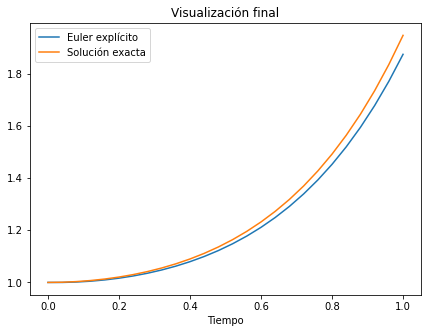

In [ ]:
# Visualización final
# Número de pasos n = 25, a y b denotan el inicio y fin del intervalo.
num_pasos = 25
a  = 0
b  = 1

h = (b - a) / num_pasos
intervalo = np.arange(a, b + h, h)
n, t, w = euler_ex(flujo=f, intervalo=intervalo, valor_inicial=y_0, num_pasos=num_pasos)

y_t = []
for t_ in intervalo:
  y_t.append(y(t_))

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(t, w, label='Euler explícito')
ax.plot(t, y_t, label='Solución exacta')
ax.set_xlabel('Tiempo')
ax.set_title('Visualización final')
ax.legend()

#### ¿Por qué necesitaríamos otros métodos? (Ejemplo 6.9)

\begin{align}
  \begin{cases}
    y' = -4t^3y^2 \\
    y(-10) = y_0 = 1/10001 \\
    t \in  [-10,0]
  \end{cases}
\end{align}

In [ ]:
f = lambda t,y: -4 * t**3 * y**2 
y_0 = 1/10001
a = -10
b = 0

In [ ]:
# Solución exacta a la EDO
y = lambda t: 1 / (t**4 + 1)

¿Qué tan bueno es el método de Euler para aproximar la solución en $t=0$?

CPU times: user 1.88 s, sys: 84.9 ms, total: 1.96 s
Wall time: 1.97 s


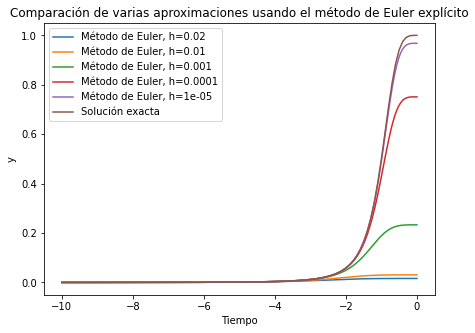

In [ ]:
%%time
pasos = [500, 1000, 10000, 100000, 1000000]

fig1, ax1 = plt.subplots(figsize=(7,5))
ax1.set_title('Comparación de varias aproximaciones usando el método de Euler explícito')
for n_ in pasos:
  h = (b - a) / n_
  intervalo = np.arange(a, b + h, h)
  n, t, w = euler_ex(flujo=f, intervalo=intervalo, valor_inicial=y_0, num_pasos=n_)

  ax1.plot(t, w, label=f'Método de Euler, h={h}')
  ax1.set_xlabel('Tiempo')
  ax1.set_ylabel('y')

y_t = []
t = []
for t_ in np.arange(-10,0.1,.1):
  y_t.append(y(t_))
  t.append(t_)
ax1.plot(t, y_t, label="Solución exacta")

ax1.legend() 

Para este ejemplo "inocente", incluso una aproximación que usa un millón de pasos para llegar a $t=0$ se ve incorrecta. También resulta ser bastante tardada (alrededor de 2 segundos).

De este ejemplo nos damos cuenta que se necesitan métodos más precisos para lograr una aproximación más precisa usando un tiempo de cómputo razonable.

# Método del trapecio (explícito)

### Código 

In [ ]:
def trapecio_ex(flujo, intervalo, valor_inicial, num_pasos):
  """
  """
  inicio = intervalo[0]
  fin = intervalo[-1]
  h  = (fin - inicio)/num_pasos

  n = [0]
  t = [inicio]
  w = [valor_inicial]
  
  for i in range(num_pasos):
    n.append(i + 1)
    t.append(t[i] + h)
    w.append(w[i] + (h/2)*(flujo(t[i],w[i]) + flujo(t[i] + h, paso_euler(h, flujo, t[i], w[i]))))

  return n, t, w 

### Pruebas

#### Ejemplo 6.10

\begin{align}
  \begin{cases}
    y' = ty + t^3 \\
    y(0) = y_0 = 1 \\
    t \in  [0,1]
  \end{cases}
\end{align}

In [ ]:
f = lambda t,y: t*y + t**3 
y_0 = 1

In [ ]:
# Solución exacta
y = lambda t: 3*np.exp((t**2)/2) - t**2 - 2

paso,t_i,w_i,y_i,e_i (error local)
0,0.000000,1.000000,1.000000,0.000000
1,0.100000,1.005050,1.005038,0.000012
2,0.200000,1.020677,1.020604,0.000073
3,0.300000,1.048262,1.048084,0.000179
4,0.400000,1.090185,1.089861,0.000323
5,0.500000,1.149943,1.149445,0.000498
6,0.600000,1.232340,1.231652,0.000688
7,0.700000,1.343736,1.342864,0.000872
8,0.800000,1.492400,1.491383,0.001017
9,0.900000,1.688981,1.687908,0.001074


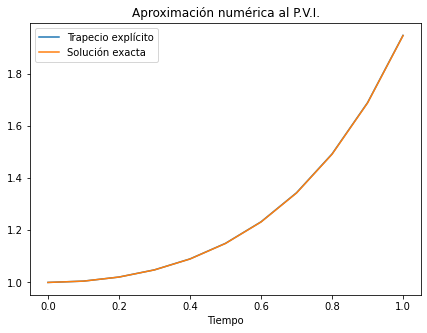

In [ ]:
# Número de pasos n = 10, a y b denotan el inicio y fin del intervalo.
num_pasos = 10
a  = 0
b  = 1

h = (b - a) / num_pasos
intervalo = np.arange(a, b + h, h)
n, t, w = trapecio_ex(flujo=f, intervalo=intervalo, valor_inicial=y_0, num_pasos=num_pasos)

y_t = []
for t_ in intervalo:
  y_t.append(y(t_))

tabla_resultados = pd.DataFrame(zip(n, t, w, y_t), columns=['paso','t_i','w_i', 'y_i'])
errores_locales = abs(tabla_resultados['y_i'] - tabla_resultados['w_i'])
tabla_resultados['e_i (error local)'] = errores_locales

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(t, w, label='Trapecio explícito')
ax.plot(t, y_t, label='Solución exacta')
ax.set_xlabel('Tiempo')
ax.set_title('Aproximación numérica al P.V.I.')
ax.legend()

tabla_resultados.style.hide_index()


Se ve que la mejora comparando contra el método de Euler es bastante. Para tener una idea más clara sobre qué tanto mejoramos, derivamos el error de truncamiento local desde series de Taylor para obtener que

\begin{align}
    e_i \leq M\frac{h^3}{6},
\end{align}

donde M es una cota superior de $y'''$ en el intervalo $[a,b]$ relevante.

En este ejemplo particular, pasa que $y'''(t) = e^{\frac{t^2}{2}}\cdot t \cdot (t^2+4)$, cuyo valor absoluto está acotado por arriba en $[0,1]$ por $M=y'''(1)=5\sqrt{e}$. Por lo tanto, el error de truncamiento local satisface
\begin{align}
    e_i \leq (5\sqrt{e})\frac{h^3}{6}
\end{align}


A su vez, el error de truncamiento global del método del trapecio satisface ser de orden $O(h^2)$.

A final de cuentas, el método del trapecio resulta ser un método de orden $O(h^2)$, donde el orden del error de truncamiento local es de orden $O(h^3)$.


#### Ejemplo 6.11

Apliquemos ahora el método del trapecio al P.V.I. donde el método de Euler no era bueno.

\begin{align}
  \begin{cases}
    y' = -4t^3y^2 \\
    y(-10) = y_0 = 1/10001 \\
    t \in  [-10,0]
  \end{cases}
\end{align}

In [ ]:
f = lambda t,y: -4 * t**3 * y**2 
y_0 = 1/10001
a = -10
b = 0

In [ ]:
# Solución exacta a la EDO
y = lambda t: 1 / (t**4 + 1)

CPU times: user 69.9 ms, sys: 0 ns, total: 69.9 ms
Wall time: 70.8 ms


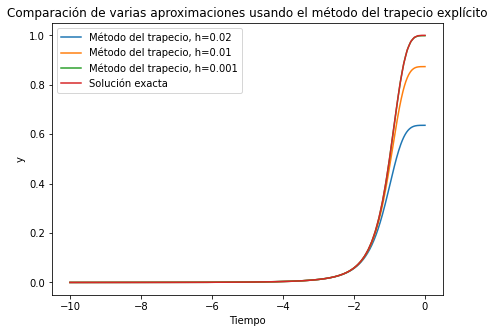

In [ ]:
%%time
pasos = [500, 1000, 10000]

fig1, ax1 = plt.subplots(figsize=(7,5))
ax1.set_title('Comparación de varias aproximaciones usando el método del trapecio explícito')
for n_ in pasos:
  h = (b - a) / n_
  intervalo = np.arange(a, b + h, h)
  n, t, w = trapecio_ex(flujo=f, intervalo=intervalo, valor_inicial=y_0, num_pasos=n_)

  ax1.plot(t, w, label=f'Método del trapecio, h={h}')
  ax1.set_xlabel('Tiempo')
  ax1.set_ylabel('y')

y_t = []
t = []
for t_ in np.arange(-10,0.1,.1):
  y_t.append(y(t_))
  t.append(t_)
ax1.plot(t, y_t, label="Solución exacta")

ax1.legend() 

La aproximación en $t=0$ se logra con un error de alrededor $.0015$ usando un tamaño de paso $h = 10^{-3}$. Esto es ya mejor que el método de Euler con tamaño de paso $h = 10^{-5}$. Usar el método del trapecio con tamaño de paso $h = 10^{-5}$ da un error en el orden de solamente $10^{-7}$.

(Tener un método de orden mayor es muy útil para $h$s pequeñas).

# Sistemas de ecuaciones diferenciales ordinarias

### Código 

In [ ]:
def sistema_de_edos(flujos, intervalo, condiciones_iniciales, num_pasos, metodo='euler explícito'):
  metodos_disponibles = ['euler explícito', 'trapecio explícito']
  if metodo not in metodos_disponibles:
    print('Por favor elige un método disponible para tu sistema de EDOs.')
    print('Los métodos disponibles son:')
    for metodo in metodos_disponibles:
      print('\t',metodo)
  
  inicio = intervalo[0]
  fin = intervalo[-1]
  h  = (fin - inicio)/num_pasos
  n = [0]
  t = [inicio]
  w = [condiciones_iniciales]
  dim = len(condiciones_iniciales)

  if metodo == 'euler explícito':
    print('Seleccionaste el método de euler explícito.')
    for i in range(num_pasos):
      n.append(i + 1)
      t.append(t[i] + h)
      vector_resultado = []
      for m in range(dim):
        vector_resultado.append(paso_euler_con_flujo_bivariado(h, flujos[m], t[i], w[i][m], w[i][0], w[i][1]))
      w.append(vector_resultado)

  elif metodo == 'trapecio explícito':
    print('Seleccionaste el método del trapecio explícito.')
    print('Este método aún no se implementa.')

  return n, t, w 

def paso_euler_con_flujo_bivariado(h, flujo, t, w, y_1, y_2):
  return w + h*flujo(t,y_1,y_2)

def eueler_ex_sis_lin(A, valores_inciales, num_pasos, tiempo_final):
  dim = len(valores_inciales) # dimensión del espacio, i.e., R^n
  h = tiempo_final/num_pasos
  B = np.eye(dim) + h*A
  sol = np.empty([dim, num_pasos+1]) # las columnas son cada vector solución en el tiempo i
  sol[:, 0] = valores_inciales
  for k in range(num_pasos):
    sol[:, k+1] = B@sol[:, k]
  return sol

### Pruebas

#### Ejemplo 6.13

\begin{align}
  \begin{cases}
    y'_1 = y^2_2 - 2y_1 \\
    y'_2 = y_1 - y_2 - ty^2_2 \\
  \end{cases}
\end{align}

con condiciones iniciales $y_1(0) = 0$, $y_2(0) = 1$.

La solución de este sistema es la función 

\begin{align}
    y_1(t) = te^{-2t} \\
    y_2(t) = e^{-t}\\
\end{align}

In [ ]:
flujo1 = lambda t, y_1, y_2: y_2**2 - 2*y_1 
y_1_ci = 0

flujo2 = lambda t, y_1, y_2: y_1 - y_2 - t*y_2**2
y_2_ci = 1

flujos = [flujo1, flujo2]
condiciones_iniciales = [y_1_ci, y_2_ci]

In [ ]:
# Solución exacta a la EDO
y1 = lambda t: t*np.exp(-2*t)
y2 = lambda t: np.exp(-t)

Seleccionaste el método de euler explícito.


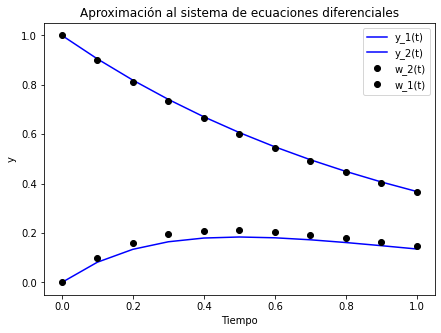

In [ ]:
# Método de Euler para resolver el sistema
# Visualización final
# Número de pasos n = 10, a y b denotan el inicio y fin del intervalo.
num_pasos = 10
a  = 0
b  = 1

h = (b - a) / num_pasos
intervalo = np.arange(a, b + h, h)
n, t, w = sistema_de_edos(flujos, intervalo, condiciones_iniciales, num_pasos, 'euler explícito')

y_1 = []
y_2 = []
for t_ in intervalo:
  y_1.append(y1(t_))
  y_2.append(y2(t_))

fig, ax = plt.subplots(figsize=(7,5))
w_1 = []
w_2 = []
for w_ in w:
  w_1.append(w_[0])
  w_2.append(w_[1])
ax.plot(t, y_1, 'b', label='y_1(t)')
ax.plot(t, y_2, 'b', label='y_2(t)')
ax.plot(t, w_2, 'ko', label='w_2(t)')
ax.plot(t, w_1, 'ko', label='w_1(t)')
ax.set_xlabel('Tiempo')
ax.set_ylabel('y')
ax.set_title('Aproximación al sistema de ecuaciones diferenciales')
ax.legend()

#### Sección 6.3.2: el péndulo

##### Péndulo ideal 

##### Péndulo amortigüado

##### Péndulo amortigüado con fuerza externa

##### Péndulo doble

#### Sección 6.3.3: mecánica celeste

##### El problema de un cuerpo

##### El problema de dos cuerpos

##### El problema de tres cuerpos

# Métodos de Runge-Kutta

Los métodos de Runge-Kutta son una familia de solvers que incluyen al método de Euler (de orden 1) y al método del trapecio (orden 2). Existen otros métodos Runge-Kutta de orden 2 aparte del trapecio, como el método del punto medio.

# Método del punto medio (explícito)

### Código 

In [ ]:
def punto_medio_ex(flujo, intervalo, valor_inicial, num_pasos):
  inicio = intervalo[0]
  fin = intervalo[-1]
  h  = (fin - inicio)/num_pasos

  n = [0]
  t = [inicio]
  w = [valor_inicial]
  
  for i in range(num_pasos):
    n.append(i + 1)
    t.append(t[i] + h)
    w.append(paso_punto_medio(h, flujo, t[i], w[i]))

  return n, t, w 

def paso_punto_medio(h, flujo, t, y):
  return y + h*flujo(t+h/2, y+(h/2)*(flujo(t,y)))

### Pruebas

#### Ejemplo 6.10

\begin{align}
  \begin{cases}
    y' = ty + t^3 \\
    y(0) = y_0 = 1 \\
    t \in  [0,1]
  \end{cases}
\end{align}

In [ ]:
f = lambda t,y: t*y + t**3 
y_0 = 1

In [ ]:
# Solución exacta
y = lambda t: 3*np.exp((t**2)/2) - t**2 - 2

paso,t_i,w_i,y_i,e_i (error local)
0,0.000000,1.000000,1.000000,0.000000
1,0.100000,1.005013,1.005038,0.000025
2,0.200000,1.020501,1.020604,0.000103
3,0.300000,1.047841,1.048084,0.000242
4,0.400000,1.089401,1.089861,0.000460
5,0.500000,1.148661,1.149445,0.000785
6,0.600000,1.230398,1.231652,0.001254
7,0.700000,1.340937,1.342864,0.001927
8,0.800000,1.488501,1.491383,0.002882
9,0.900000,1.683673,1.687908,0.004234


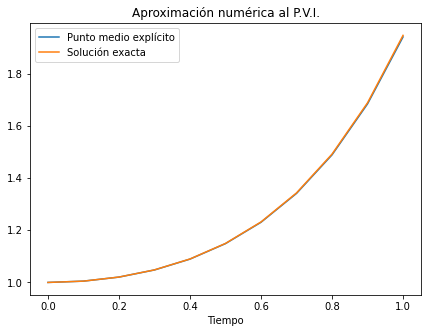

In [ ]:
# Número de pasos n = 10, a y b denotan el inicio y fin del intervalo.
num_pasos = 10
a  = 0
b  = 1

h = (b - a) / num_pasos
intervalo = np.arange(a, b + h, h)
n, t, w = punto_medio_ex(flujo=f, intervalo=intervalo, valor_inicial=y_0, num_pasos=num_pasos)

y_t = []
for t_ in intervalo:
  y_t.append(y(t_))

tabla_resultados = pd.DataFrame(zip(n, t, w, y_t), columns=['paso','t_i','w_i', 'y_i'])
errores_locales = abs(tabla_resultados['y_i'] - tabla_resultados['w_i'])
tabla_resultados['e_i (error local)'] = errores_locales

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(t, w,label='Punto medio explícito')
ax.plot(t, y_t, label='Solución exacta')
ax.set_xlabel('Tiempo')
ax.set_title('Aproximación numérica al P.V.I.')
ax.legend()

tabla_resultados.style.hide_index()


#### Ejemplo 6.11

\begin{align}
  \begin{cases}
    y' = -4t^3y^2 \\
    y(-10) = y_0 = 1/10001 \\
    t \in  [-10,0]
  \end{cases}
\end{align}

In [ ]:
f = lambda t,y: -4 * t**3 * y**2 
y_0 = 1/10001
a = -10
b = 0

In [ ]:
# Solución exacta a la EDO
y = lambda t: 1 / (t**4 + 1)

CPU times: user 63.9 ms, sys: 852 µs, total: 64.7 ms
Wall time: 67.5 ms


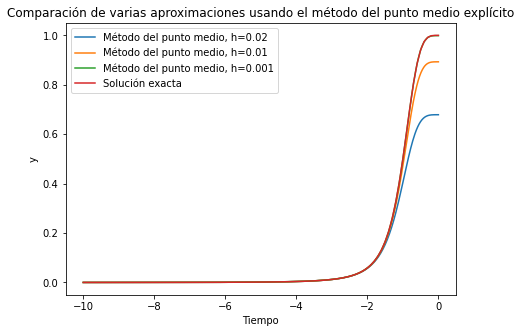

In [ ]:
%%time
pasos = [500, 1000, 10000]

fig1, ax1 = plt.subplots(figsize=(7,5))
ax1.set_title('Comparación de varias aproximaciones usando el método del punto medio explícito')
for n_ in pasos:
  h = (b - a) / n_
  intervalo = np.arange(a, b + h, h)
  n, t, w = punto_medio_ex(flujo=f, intervalo=intervalo, valor_inicial=y_0, num_pasos=n_)

  ax1.plot(t, w, label=f'Método del punto medio, h={h}')
  ax1.set_xlabel('Tiempo')
  ax1.set_ylabel('y')

y_t = []
t = []
for t_ in np.arange(-10,0.1,.1):
  y_t.append(y(t_))
  t.append(t_)
ax1.plot(t, y_t, label="Solución exacta")

ax1.legend() 


# Método de Runge-Kutta de orden 4

### Código

In [ ]:
def RK4(flujo, intervalo, valor_inicial, num_pasos):
  inicio = intervalo[0]
  fin = intervalo[-1]
  h  = (fin - inicio)/num_pasos

  n = [0]
  t = [inicio]
  w = [valor_inicial]
  
  for i in range(num_pasos):
    n.append(i + 1)
    t.append(t[i] + h)
    w.append(paso_RK4(h, flujo, t[i], w[i]))

  return n, t, w 

def paso_RK4(h, flujo, t, y):
  s1 = flujo(t, y)
  s2 = flujo(t + h/2, y + (h/2)*s1)
  s3 = flujo(t + h/2, y + (h/2)*s2)
  s4 = flujo(t + h, y + h*s3)
  return y + (h/6)*(s1 + 2*s2 + 2*s3 + s4)

### Pruebas

#### Ejemplo 6.18

\begin{align}
  \begin{cases}
    y' = ty + t^3 \\
    y(0) = 1 \\
    t \in  [0,1]
  \end{cases}
\end{align}

In [ ]:
f = lambda t,y: t*y + t**3 
y_0 = 1
a = 0
b = 1

In [ ]:
# Solución exacta
y = lambda t: 3*np.exp((t**2)/2) - t**2 - 2

pasos n,tamaño del paso h,w(1),y(1),error global
5,0.200000,1.946140,1.946164,0.000024
10,0.100000,1.946162,1.946164,0.000001
20,0.050000,1.946164,1.946164,0.000000
40,0.025000,1.946164,1.946164,0.000000
80,0.012500,1.946164,1.946164,0.000000
160,0.006250,1.946164,1.946164,0.000000
320,0.003125,1.946164,1.946164,0.000000
640,0.001563,1.946164,1.946164,0.000000


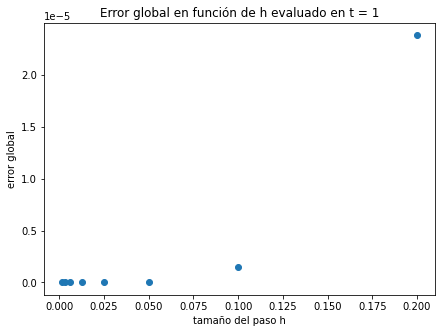

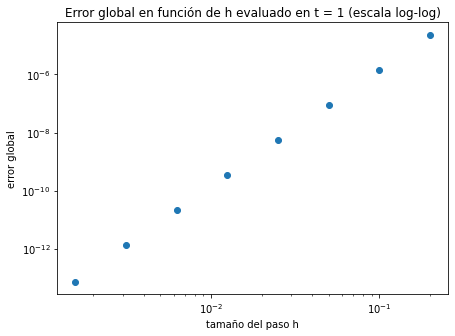

In [ ]:
resultado_exacto = y(1)
resultados_cada_paso = []
h_cada_paso = []
pasos = [5, 10, 20, 40, 80, 160, 320, 640]

for n_ in pasos:
  h = (b - a) / n_
  intervalo = np.arange(a, b + h, h)
  n, t, w = RK4(flujo=f, intervalo=intervalo, valor_inicial=y_0, num_pasos=n_)
  resultados_cada_paso.append(w[-1])
  h_cada_paso.append(h)

tabla_resultados = pd.DataFrame(zip(pasos, h_cada_paso, resultados_cada_paso,), 
                                columns=['pasos n', 'tamaño del paso h','w(1)'])
tabla_resultados['y(1)'] = resultado_exacto
errores_globales = abs(tabla_resultados['y(1)'] - tabla_resultados['w(1)'])
tabla_resultados['error global'] = errores_globales

fig1, ax1 = plt.subplots(figsize=(7,5))
ax1.plot(h_cada_paso, errores_globales, 'o')
ax1.set_xlabel('tamaño del paso h')
ax1.set_ylabel('error global')
ax1.set_title('Error global en función de h evaluado en t = 1')

fig2, ax2 = plt.subplots(figsize=(7,5))
ax2.plot(h_cada_paso, errores_globales, 'o')
ax2.set_xlabel('tamaño del paso h')
ax2.set_ylabel('error global')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('Error global en función de h evaluado en t = 1 (escala log-log)')

tabla_resultados.style.hide_index()
#print(tabla_resultados['error global'])

# Métodos de paso variable

# Par Runge-Kutta 2/3

### Código

In [ ]:
# El método de trapecio explícito se usará como RK2

def RK3(flujo, intervalo, valor_inicial, num_pasos):
  inicio = intervalo[0]
  fin = intervalo[-1]
  h  = (fin - inicio)/num_pasos

  n = [0]
  t = [inicio]
  w = [valor_inicial]
  
  for i in range(num_pasos):
    n.append(i + 1)
    t.append(t[i] + h)
    w.append(paso_RK3(h, flujo, t[i], w[i]))

  return n, t, w 

def paso_RK3(h, flujo, t, y):
  s1 = flujo(t, y)
  s2 = flujo(t + h, y + h*s1)
  s3 = flujo(t + h/2, y + (h/2)*(s1+s2)/2)
  return y + h*(s1 + 4*s3 + s2)/6

def RK23():
  return


# Método de diferencias finitas

#### Ejercicio 6, Práctica 2

Queremos resolver el P.V.F.

\begin{align}
  \begin{cases}
    y'' = 4y'(2-y) \\
    y(0) = 2 \\
    y(\frac{1}{2}) = 2 - \frac{\pi}{4}
  \end{cases}
\end{align}

In [ ]:
t0 = 0
w0 = 2

tN = 1/2
wN = 2 - np.pi/4

N = 10
h = (tN  - t0)/N
t = np.linspace(t0, tN, N + 1)

In [ ]:
# Solución exacta
y = lambda t: 2 - np.pi/4*np.tan(np.pi*t/2)

In [ ]:
# Jacobiana JG
A = np.diag(2*np.ones(N-1)) - np.diag(np.ones(N-2), 1) - np.diag(np.ones(N-2), -1)

# Vector W
W = np.linspace(w0, wN, N + 1)

# Aplicamos Newton
w = np.zeros(N-1)
for k in range(1):
  # índices inclusivos
  mG = W[2:N+1] - 2*W[1:N] + W[0:N-1] - 2*h*(W[2:N+1] - W[0:N-1])*(2 - W[1:N])
  # índices exclusivos
  Bn = np.diag(W[0:N-1] - W[2:N+1]) + np.diag(2 - W[1:N-1], 1) + np.diag(W[2:N] - 2, -1)
  w = np.linalg.solve(A + 2*h*Bn, mG) + W[1:N]
  W[1:N] = w

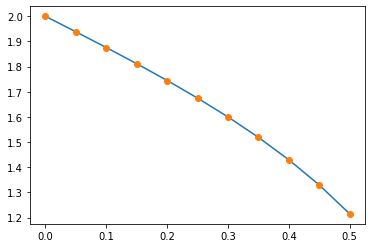

In [ ]:
plt.plot(t, y(t))
plt.plot(t, W, 'o')